## Exercise meanshift
1. load 'data/iris_data.csv' into a dataframe (use decimal=',') and remove the 2 Petal columns. Now we are left with a 2D feature space
2. get unique labels (Species column)
3. plot with a scatter plot each iris flower sample colored by label (3 different colors)

4. use: MeanShift and estimate_bandwidth from sklearn.cluster to first estimate bandwidth and then get the clusters (HINT: estimate_bandwidth() takes an argument: quantile set it to 0.2 for best result)
5. print out labels, cluster centers and number of clusters (as returned from the MeanShift function)
5. create a new scatter plot where each flower is colored according to cluster label
6. add a dot for the cluster centers
7. Compare the 2 plots (colored by actual labels vs. colored by cluster label)
8. Try changing the 'quantile' argument to 0.15 and see what happens to your cluster plot.

In [1]:
#load 'data/iris_data.csv' into a dataframe (use decimal=',') and remove the 2 Petal columns. Now we are left with a 2D feature space
import pandas as pd
df = pd.read_csv('../data/iris_data.csv', decimal=",")

df.drop('Petal length', inplace=True, axis=1)
df.drop('Petal width', inplace=True, axis=1)
print(df)


     Sepal length  Sepal width       Species
0             5.1          3.5     I. setosa
1             4.9          3.0     I. setosa
2             4.7          3.2     I. setosa
3             4.6          3.1     I. setosa
4             5.0          3.6     I. setosa
..            ...          ...           ...
145           6.7          3.0  I. virginica
146           6.3          2.5  I. virginica
147           6.5          3.0  I. virginica
148           6.2          3.4  I. virginica
149           5.9          3.0  I. virginica

[150 rows x 3 columns]


In [2]:
#get unique labels (Species column)
uniqueSpecies = df['Species'].unique()
uniqueSpecies


array(['I. setosa', 'I. versicolor', 'I. virginica'], dtype=object)

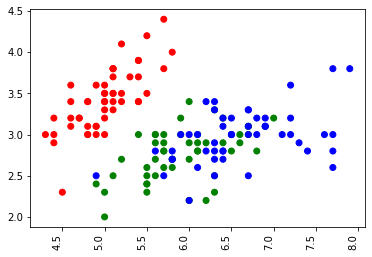

In [3]:
#plot with a scatter plot each iris flower sample colored by label (3 different colors)
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

colors = {'I. setosa':'red', 'I. versicolor':'green', 'I. virginica':'blue'}

ax.scatter(df['Sepal length'], df['Sepal width'], c=df['Species'].map(colors))

plt.xticks(rotation=90, horizontalalignment='right',fontweight='light')
plt.show()

In [34]:
#use: MeanShift and estimate_bandwidth from sklearn.cluster to first estimate bandwidth and then get the clusters (HINT: estimate_bandwidth() takes an argument: quantile set it to 0.2 for best result)
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift, estimate_bandwidth
import numpy as np

#df.drop('Species', axis=1, inplace=True)


def mean_shift(data, n_samples=1000):
    bandwidth = estimate_bandwidth(data, quantile=0.2, 
                                   n_samples=n_samples)

    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    ms.fit(data)
    labels = ms.labels_
    cluster_centers = ms.cluster_centers_

    labels_unique = np.unique(labels)
    n_clusters = len(labels_unique)

    print('Number of estimated clusters : {}'.format(n_clusters))
    
    return labels, cluster_centers, n_clusters
labels, cluster_centers, n_clusters = mean_shift(df)


Number of estimated clusters : 3


In [32]:
#print out labels, cluster centers and number of clusters (as returned from the MeanShift function)
print(labels)
print("--------------")
print(cluster_centers)
print("--------------")
print(n_clusters)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 4 2 2 2 2 2 2 2 2 3 0 0 4 0 1 0 4 0 4 4 1 1 1 1 0 1 1 1 1 1 1 1 1
 0 0 0 0 1 1 4 4 1 1 1 1 0 1 1 1 1 1 1 4 1 1 1 0 4 1 0 1 3 0 0 3 4 3 0 5 0
 0 0 1 1 0 0 5 3 1 0 1 3 0 0 3 1 1 0 3 3 5 0 0 1 3 0 0 1 0 0 0 1 0 0 0 1 0
 0 1]
--------------
[[6.4902439  3.01463415]
 [5.88055556 2.81388889]
 [4.96388889 3.375     ]
 [7.43333333 2.92222222]
 [4.94285714 2.38571429]
 [7.8        3.8       ]]
--------------
6


Number of estimated clusters : 3


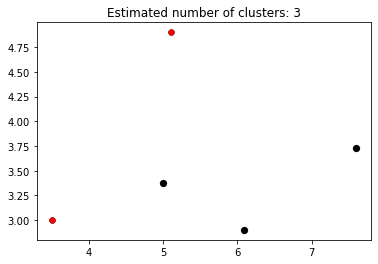

In [43]:
#create a new scatter plot where each flower is colored according to cluster label
from itertools import cycle
labels, cluster_centers, n_clusters = mean_shift(df)

fig = plt.figure()
ax = fig.add_subplot(111)

arr = df.to_numpy()

colors = cycle('bgrcmy')
for k, col in zip(range(n_clusters), colors):
    my_members = (labels == k)
    cluster_center = cluster_centers[k]
                                                                                                
    x, y = arr[my_members,0], arr[my_members,1]
    ax.scatter(x, y, c=col, linewidth=0.2)
    ax.scatter(cluster_center[0], cluster_center[1], c='k', s=50, linewidth=0.2)
    
plt.title('Estimated number of clusters: {}'.format(n_clusters))
plt.show()
